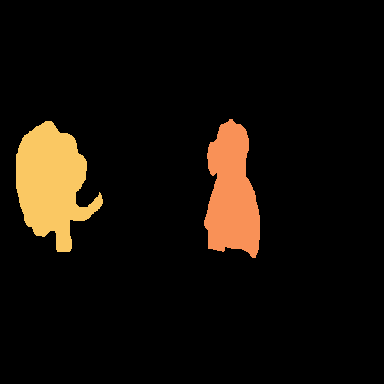

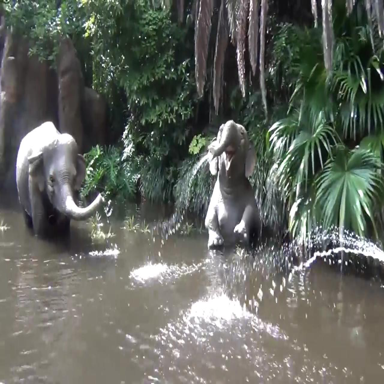

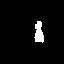

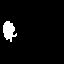

184


In [178]:
from PIL import Image
import numpy as np
import cv2
# from matplotlib import pyplot as plt
# %matplotlib inline
frame1 = Image.open('/home/lr/dataset/YouTube-VOS/train/JPEGImages/0358b938c1/00220.jpg').resize((384,384))
anno1_raw = Image.open('/home/lr/dataset/YouTube-VOS/train/Annotations/0358b938c1/00220.png').resize((384,384))

anno1 = np.array(anno1_raw).astype(np.uint8)
anno1 = cv2.resize(anno1, (64,64), interpolation=cv2.INTER_NEAREST) 

mask2 = Image.fromarray((anno1 == 2).astype(np.uint8) * 255)
mask3 = Image.fromarray((anno1 == 3).astype(np.uint8) * 255)


display(anno1_raw)
display(frame1)
display(mask2)
display(mask3)

print((anno1 ==3).sum())


这一部分代码主要是验证对segmentation mask进行resize的操作，对于segmentation mask还是用nearnest的插值方法

In [179]:
tmp_mask = np.array(Image.open('/home/lr/dataset/YouTube-VOS/train/Annotations/1f8014b7fd/00045.png').convert('P'), dtype=np.uint8)
h,w = tmp_mask.shape
if h < w:
    tmp_mask_ = Image.fromarray(tmp_mask).resize((int(w/h*480), 480), resample=Image.NEAREST) 
else:
    tmp_mask_ = Image.fromarray(tmp_mask).resize((480, int(h/w*480)), resample=Image.NEAREST)


anno1 = np.array(anno1_raw)
anno1 = cv2.resize(anno1, (24,24), interpolation=cv2.INTER_NEAREST)
mask3 = Image.fromarray((anno1 == 4).astype(np.uint8) * 255)

display(mask3)

验证一下：给定feature map和mask， 取pixel embedding的操作

In [180]:
import torch
feature = torch.arange(12).reshape(1,3,4)
mask = torch.BoolTensor([[1,0,0,1]])
mask = mask.unsqueeze(1).repeat(1,3,1)
pixel_emb = torch.masked_select(feature, mask).reshape(1,3,2).permute(0,2,1)

valid affanity operations in STM code

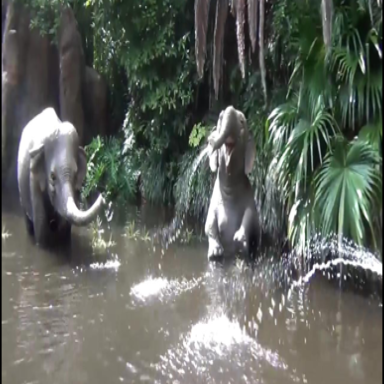

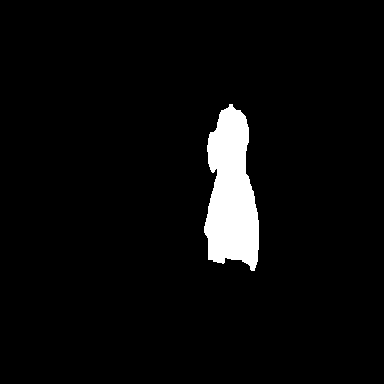

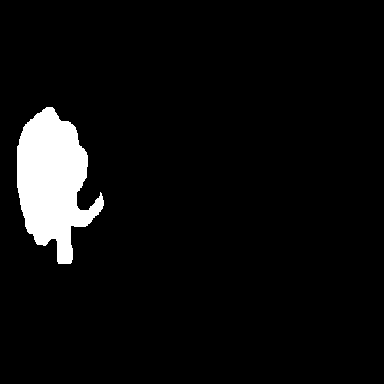

In [181]:
import imgaug.augmenters as iaa

affinity = iaa.Sequential([
            # iaa.Sometimes(
            #     0.5,
            #     iaa.Affine(rotate=(-30, 30))
            # ),
            # iaa.Sometimes(
            #     0.5,
            #     iaa.Affine(shear=(-15, 15))
            # ),
            # iaa.Sometimes(
            #     0.5,
            #     iaa.Affine(translate_px={"x": (-15, 15), "y": (-15, 15)})
            # ),
            iaa.Sometimes(
                0.5,
                iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)})
            ),   
            ], random_order=True)


frame1 = np.array(frame1)
anno1 = np.array(anno1_raw)

frame1, anno1 = affinity(image = frame1, segmentation_maps = anno1[np.newaxis,:,:,np.newaxis])

anno1 = anno1[0,:,:,0]
mask2 = Image.fromarray((anno1 == 2).astype(np.uint8) * 255)
mask3 = Image.fromarray((anno1 == 3).astype(np.uint8) * 255)



display(Image.fromarray(frame1))
display(mask2)
display(mask3)


